In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Turn JSON lines into JSON array
def json_line_to_array(filename):
    with open(filename) as f:
        lines = f.readlines()
        lines = map(lambda line: line.rstrip(), lines) #remove \n
        json_str = '[' + ','.join(lines) + ']'
        return json_str

In [34]:
# Read in data from sample of /r/politics users
# reddit_pos = pd.read_json('data/politicos/json/multi.json')
# reddit_neg = pd.read_json('data/politicos/json/single.json')
reddit_pos = pd.read_json(json_line_to_array('data/politicos/json/balanced_multi.json'))
reddit_neg = pd.read_json(json_line_to_array('data/politicos/json/balanced_single.json'))
first_post = pd.concat([reddit_pos, reddit_neg], axis=0)

In [35]:
# multi_upvotes = reddit_pos[ reddit_pos['first_post_ups']>1 ]['first_post_body']
# multi_no_upvotes.to_csv('multi_upvotes.csv')

In [36]:
# Time to second post in multi
def time_to_second_post(post_datetimes):
    if isinstance(post_datetimes, float):
        return None
    if len(post_datetimes) > 1:
        post_dts = pd.Series(post_datetimes).apply(lambda dt: pd.to_datetime(dt))
        post_dts.sort(inplace=True)
        first_post_dt = post_dts.iloc[0]
        second_post_dt = post_dts.iloc[1]
        delta = second_post_dt - first_post_dt
        return delta.days

In [37]:
first_post['second_post_day'] = first_post['post_datetimes'].apply(time_to_second_post)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

(0, 5000)

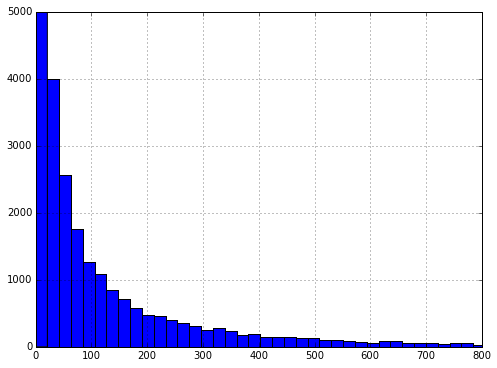

In [44]:
plt.figure(figsize=(8,6))
first_post['second_post_day'].hist(bins=100)
plt.xlim(0,800)
plt.ylim(0,5000)

In [62]:
# Proportion of multi_posters whose second post was within 10 days
print np.mean( np.logical_and( first_post['second_post_day']>0, first_post['second_post_day']<=10 ) )

0.0995374604751


In [ ]:
# loop in sets of 100 - and write to file